In [4]:
system('wget https://portal.nersc.gov/dna/RD/Metagenome_RD/MetaBAT/Files/benchmark.R')

--2021-06-09 14:24:51--  https://portal.nersc.gov/dna/RD/Metagenome_RD/MetaBAT/Files/benchmark.R
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.206.113, 128.55.206.106, 128.55.206.107, ...
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.206.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25431 (25K)
Saving to: ‘benchmark.R’

100%[======================================>] 25,431      --.-K/s   in 0.07s   

2021-06-09 14:24:51 (375 KB/s) - ‘benchmark.R’ saved [25431/25431]



In [1]:
system('head benchmark.R',intern=TRUE)

[1] "requireAll <- function(packages) {"                                                              
 [2] "    dir.create(\"~/Rlibs\", showWarnings=FALSE)"                                                 
 [3] "    .libPaths(\"~/Rlibs\")"                                                                      
 [4] "    .packages <- setdiff(packages, installed.packages()[,'Package'])"                            
 [5] "    if(length(.packages)>0) {"                                                                   
 [6] "        suppressWarnings(rm(biocLite, envir=.GlobalEnv))"                                        
 [7] "        source(\"http://bioconductor.org/biocLite.R\")"                                          
 [8] "        biocLite(.packages, dependencies=TRUE, ask=FALSE, suppressUpdates=TRUE, lib=\"~/Rlibs\")"
 [9] "    }"                                                                                           
[10] "    for(package in packages)"

    if (!requireNamespace("BiocManager", quietly = TRUE))
        install.packages("BiocManager")
    BiocManager::install()

In [1]:
source('http://portal.nersc.gov/dna/RD/Metagenome_RD/MetaBAT/Files/benchmark.R')

In [2]:
setwd('data')

In [3]:
res <- list(Sensitive=calcPerf("MetaBAT","bin1"), Specific=calcPerf("MetaBAT","bin2"), 'Specific & w/ Pair'=calcPerf("MetaBAT","bin3"),
           assembly=calcPerf("MetaBAT","bin4"))

In [4]:
printPerf(res)

,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95
0.7,132,125,114,107,91,41,12,4
0.8,128,121,111,105,90,41,12,4
0.9,112,106,98,92,79,36,11,3
0.95,100,96,89,84,73,35,11,3
0.99,60,57,55,53,44,24,5,2
,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95
0.7,136,127,118,110,89,41,11,2
0.8,131,122,115,107,88,41,11,2
0.9,116,108,103,96,78,37,10,1
0.95,101,96,92,86,71,37,10,1


In [5]:
pdf("Performance_By_Bin.pdf", width=8, height=8)
plotPerf(res)
dev.off()

png 
  2

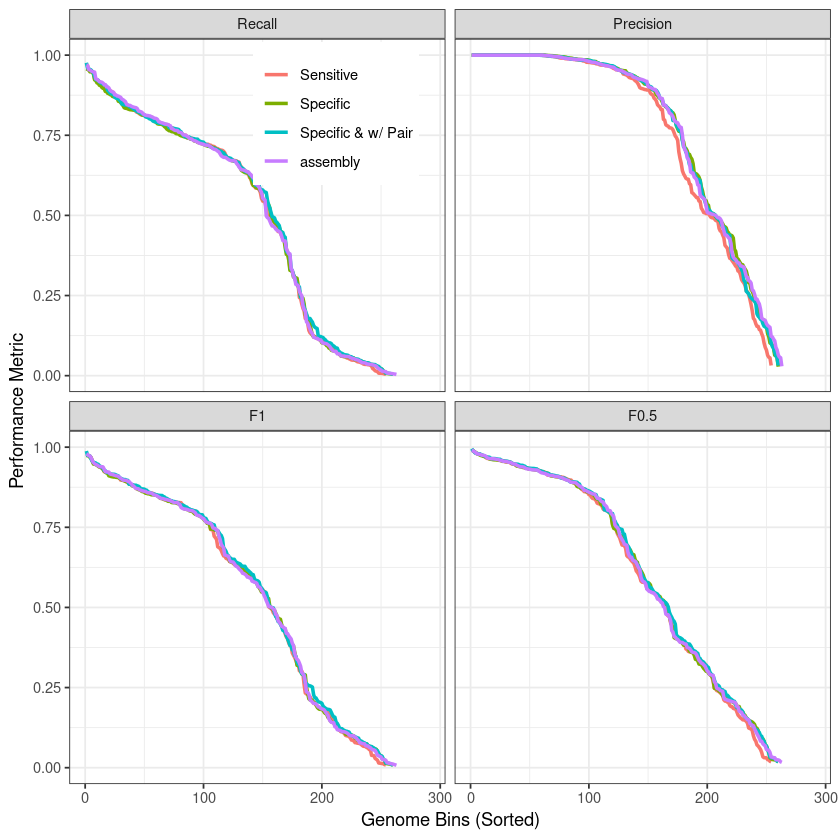

In [6]:
plotPerf(res)

In [7]:
res <- list(MetaBAT=calcPerf("MetaBAT","bin1"), Canopy=calcPerf("Canopy","bin_canopy","prof_canopy"))
printPerf(res)

,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95
0.7,132,125,114,107,91,41,12,4
0.8,128,121,111,105,90,41,12,4
0.9,112,106,98,92,79,36,11,3
0.95,100,96,89,84,73,35,11,3
0.99,60,57,55,53,44,24,5,2
,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95
0.7,107,102,95,85,63,26,2,1
0.8,103,98,91,82,61,26,2,1
0.9,94,91,85,77,57,24,1,0
0.95,89,86,80,73,53,22,1,0


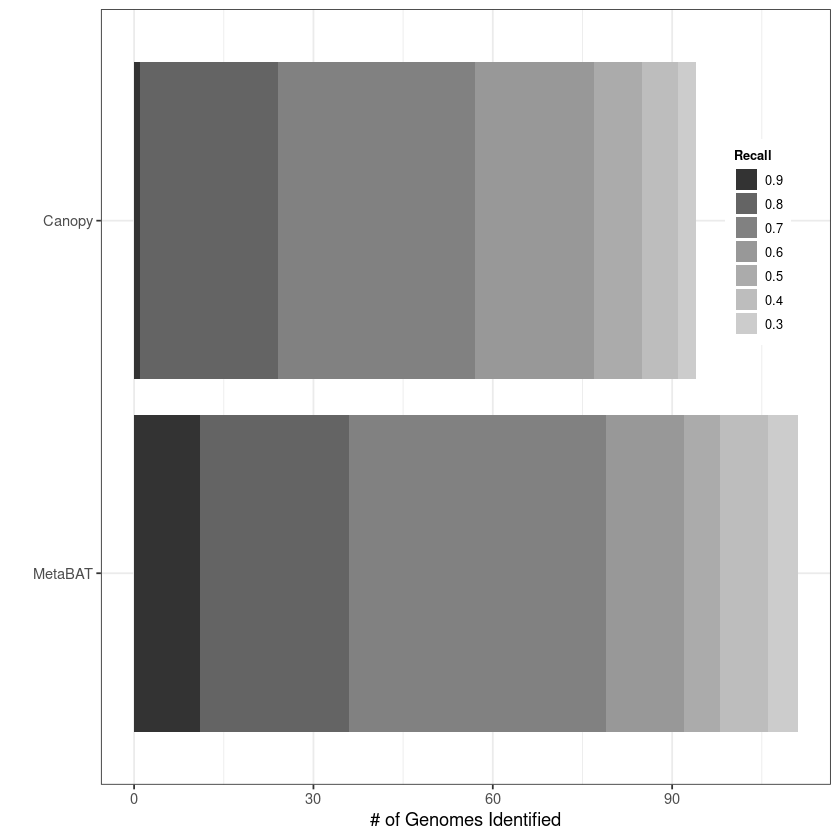

In [8]:
plotPerf3(res, prec=.9)


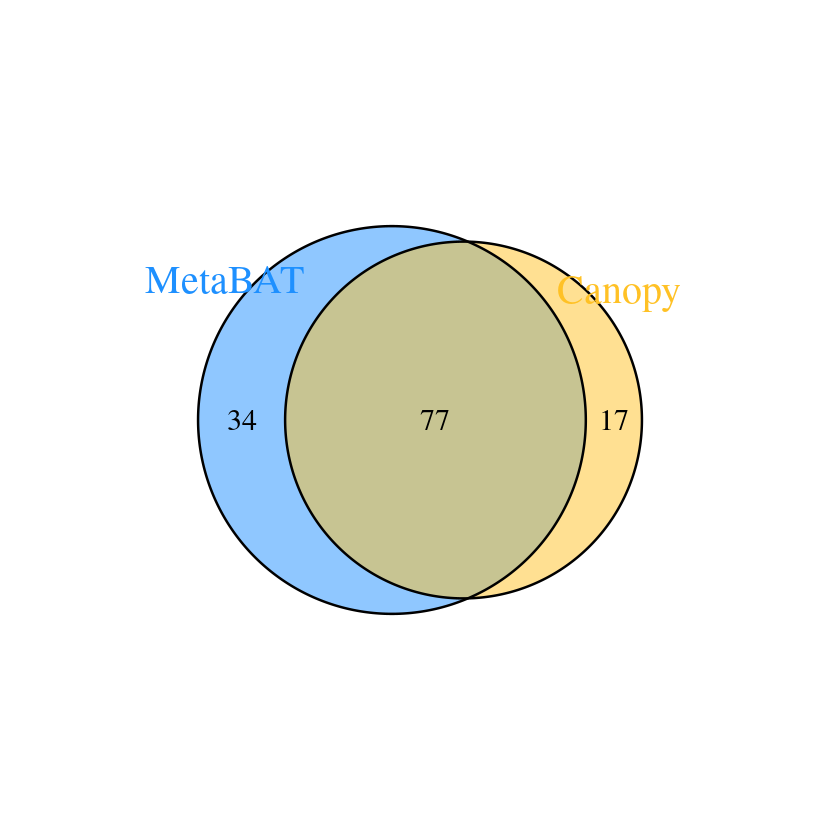

In [11]:
plotPerfVenn(res, sel=names(res)[1:4])

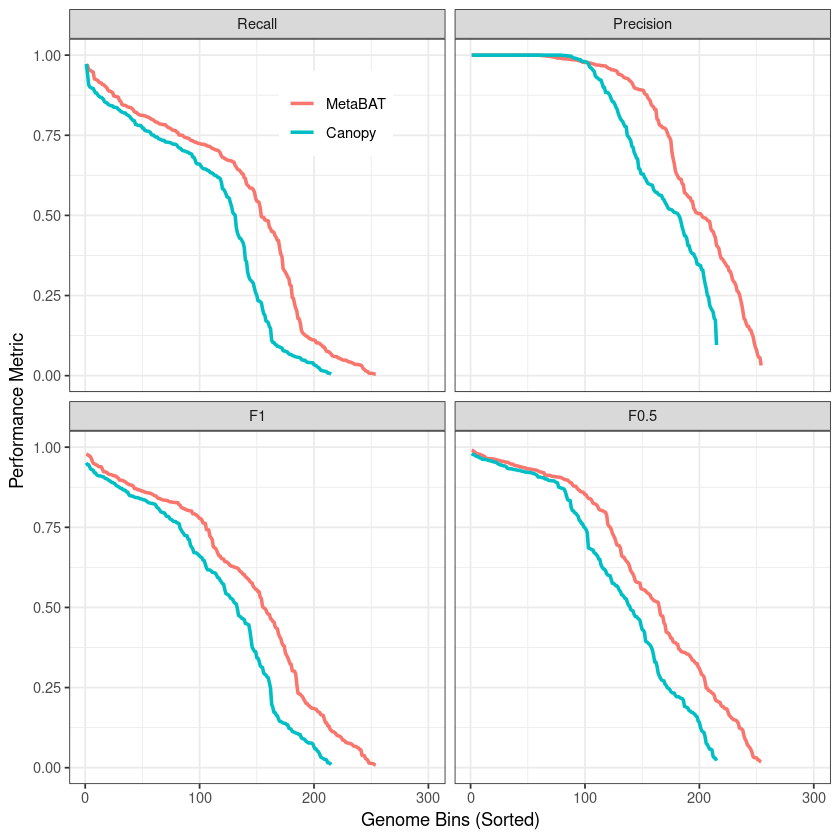

In [12]:
plotPerf(res, xlim=300)


In [14]:
res <- list(MetaBAT=calcPerf("MetaBAT","bin1"), Canopy=calcPerf("Canopy","bin_canopy","prof_canopy"),MetaBAT2=calcPerf("MetaBAT","mb2bin"))
printPerf(res)

,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95
0.7,132,125,114,107,91,41,12,4
0.8,128,121,111,105,90,41,12,4
0.9,112,106,98,92,79,36,11,3
0.95,100,96,89,84,73,35,11,3
0.99,60,57,55,53,44,24,5,2
,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95
0.7,107,102,95,85,63,26,2,1
0.8,103,98,91,82,61,26,2,1
0.9,94,91,85,77,57,24,1,0
0.95,89,86,80,73,53,22,1,0


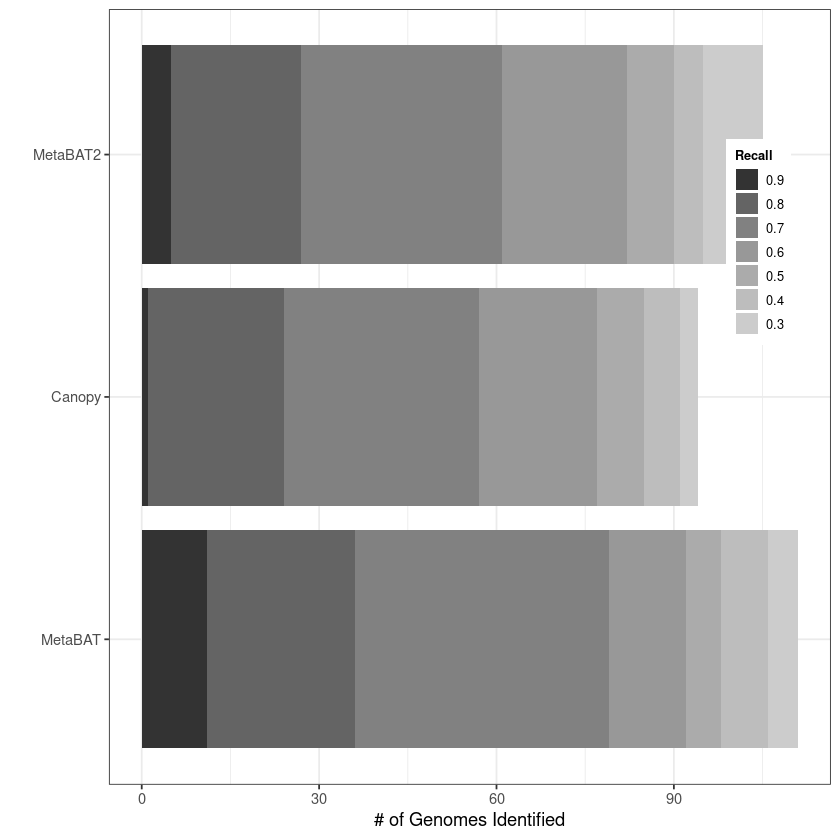

In [15]:
plotPerf3(res, prec=.9)


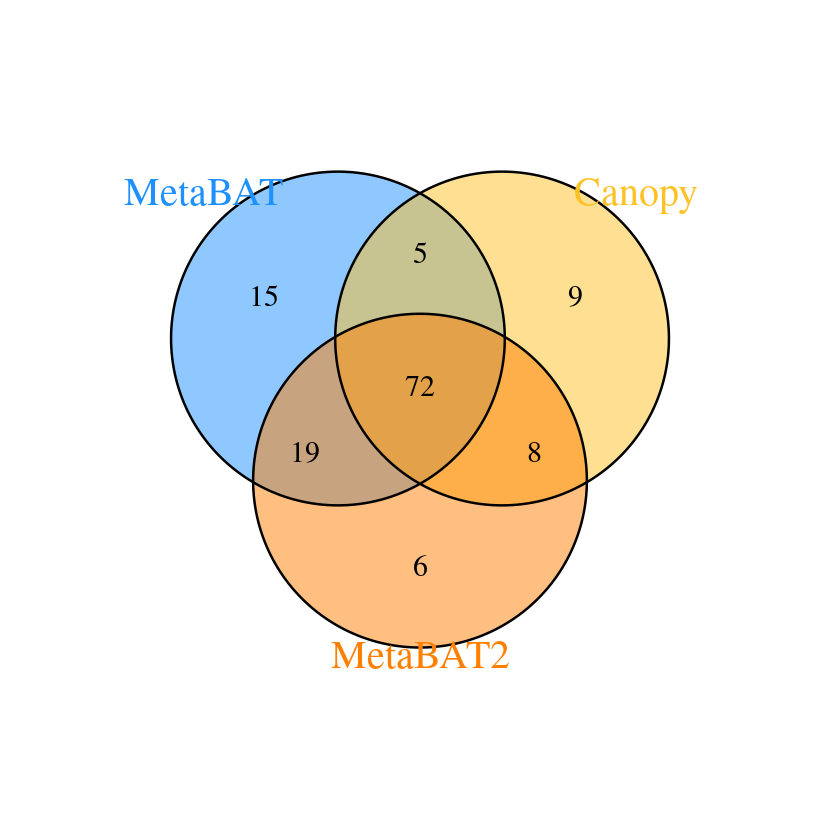

In [16]:
plotPerfVenn(res, sel=names(res)[1:4])

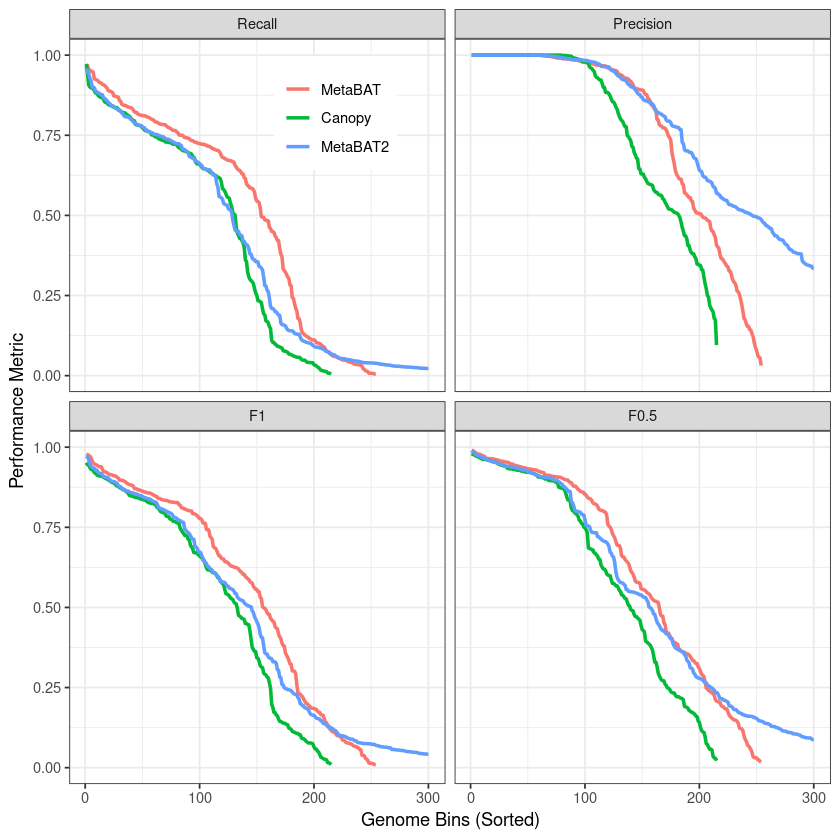

In [17]:
plotPerf(res, xlim=300)
